In [1]:
# importing libraries
import pandas as pd
import os
import requests
import tweepy
import json
import numpy as np

# Gathering Data From 3 Data Sources

#### 1. Directly download twitter-archive-enhanced.csv

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### 2 Download the image predictions file from [HERE](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image_predictions.tsv", 'wb') as file:
    file.write(response.content)
tweet_image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')

#### 3 Use tweepy API to download twitter data, and save the data in tweets_json.txt file

In [5]:
"""
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret_key"
access_token = "your_access_token"
access_secret = "your_access_secret_token"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

no_status = {}

with open('tweets_json.txt', 'w') as outfile:
    for tweet_id in twitter_archive.tweet_id:
        print(twitter_archive.index[twitter_archive.tweet_id == tweet_id][0], tweet_id)
        try:
            status = api.get_status(tweet_id, tweet_mode='extended')
            json_string = json.dumps(status._json)
            outfile.write(json_string + '\n')
        except Exception as e:
            no_status[tweet_id] = e
"""            

'\nconsumer_key = "your_consumer_key"\nconsumer_secret = "your_consumer_secret_key"\naccess_token = "your_access_token"\naccess_secret = "your_access_secret_token"\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\napi = tweepy.API(auth, wait_on_rate_limit = True)\n\nno_status = {}\n\nwith open(\'tweets_json.txt\', \'w\') as outfile:\n    for tweet_id in twitter_archive.tweet_id:\n        print(twitter_archive.index[twitter_archive.tweet_id == tweet_id][0], tweet_id)\n        try:\n            status = api.get_status(tweet_id, tweet_mode=\'extended\')\n            json_string = json.dumps(status._json)\n            outfile.write(json_string + \'\n\')\n        except Exception as e:\n            no_status[tweet_id] = e\n'

In [4]:
# Read tweets_json.txt data into a pandas DataFrame
df_list = []
with open('tweets_json.txt', 'r') as file:
    for i in range(sum(1 for line in open('tweets_json.txt'))):
        data = file.readline()
        json_dict = json.loads(data) 
        tweet_id = json_dict['id']
        retweet_count = json_dict['retweet_count']
        favourite_count = json_dict['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})

api_data = pd.DataFrame(df_list)

# Assessing Data

* Include only original ratings (no retweets) that have images.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs

In [5]:
# Some ways to assess the twitter_archive df
twitter_archive.head()
twitter_archive.info()
twitter_archive.name.value_counts()
twitter_archive.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
# Some ways to assess the tweet_image_predictions df
tweet_image_predictions.info()
tweet_image_predictions.head()
tweet_image_predictions.p1.value_counts()
tweet_image_predictions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [7]:
# Some ways to assess the api_data df
api_data.tail()
api_data.sample(5)
api_data.info()
api_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favourite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


,tweet_id,retweet_count,favourite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2460.012033,7029.766223
std,6.820795e+16,4166.054961,10924.154802
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1220.500000
50%,7.178418e+17,1144.000000,3039.000000
75%,7.986547e+17,2846.000000,8568.500000
max,8.924206e+17,70371.000000,144322.000000


## Quality Issues

#### 1. incorrect ratings for various tweets
    - tweet id 740373189193256964, correct rating is 14/10
    - tweet id 716439118184652801 correct rating is 11/10
    - tweetid 722974582966214656 correct rating is 13/10
    - tweet id 778027034220126208 correct rating should be 11.27 /10
    - tweet id 680494726643068929 correct rating should be 11.26 / 10
    - tweet id 786709082849828864 correct rating should be 9.75/10


#### 2. remove retweeted tweets from archive table

#### 3. exclude non-dog pictures (i.e. remove rows where p1_dog=False and p2_dog=False and p3_dog=False) from image_predictions

#### 4. Assigning more appropriate dtypes for some columns to reduce dataset size
- timestamp column should be datetime format
- change img_num dtype to int16
- dog_stage column should be category datatype

#### 5. Change names 'a', 'an' and 'the' in the name column in the archive table to 'None'

#### 6. picking the most suitable image prediction

#### 7. Inconsistent dog breed names
- capitalise the first letter of each word and change hyphens to underscores (e.g. soft-coated_wheaten_terrier would be soft_coated_wheaten_terrier, wire-haired_fox_terrier would be wire_haired_fox_terrier, etc

## Tidiness Issues

#### 1. all three tables should be merged into one on tweet id

#### 2. Multiple variables (doggo, floofer, pupper and puppo) should be one column

#### 3. rating_numerator and rating_denominator should be one column

## Cleaning Data
- Fixing all of the quality issues and tidiness issues mentioned above

#### Create copies of original datasets

In [8]:
twitter_archive_clean = twitter_archive.copy()
tweet_image_predictions_clean = tweet_image_predictions.copy()
api_data_clean = api_data.copy()

### Tidiness Issue #1

#### Define
- all three tables should be merged into one on tweet_id

#### Code

In [9]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_image_predictions_clean, how='inner',
                                on='tweet_id', validate="1:1")

In [10]:
twitter_archive_clean = pd.merge(twitter_archive_clean, api_data, how='inner', on='tweet_id', validate="1:1")

#### Test

In [11]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

### Tidiness Issue #2

#### Define
- doggo, pupper, puppo and floofer columns should be one column

#### Code

In [12]:
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace('None', '')
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace('None', '')
twitter_archive_clean.puppo = twitter_archive_clean.puppo.replace('None', '')
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace('None', '')

twitter_archive_clean['dog_stage'] = (twitter_archive_clean.doggo + '_' + twitter_archive_clean.floofer
                                      + '_' + twitter_archive_clean.pupper + '_' + 
                                      twitter_archive_clean.puppo)

twitter_archive_clean.dog_stage = (twitter_archive_clean.dog_stage.
                                   str.extract(r'([a-zA-Z]+_?[a-zA-Z]+_?_?[a-zA-Z]+_?[a-zA-Z]+_?_?_?[a-zA-Z]+)'))

twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggo__pupper', 'doggo, pupper')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggo___puppo', 'doggo, puppo')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.replace('doggo_floofer', 'doggo, floofer')

twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo', 'pupper', 'floofer', 'puppo'])

#### Test

In [13]:
twitter_archive_clean.dog_stage.value_counts()

pupper            210
doggo              65
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Tidiness Issue #3

#### Define
- rating numerator and rating denominator should be one column

#### Code

In [14]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

#### Test

In [15]:
twitter_archive_clean.rating.describe()

count    2057.000000
mean        1.169559
std         4.004349
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

### Quality Issue #1

#### Define
Fixing some incorrect ratings
- tweet id 740373189193256964, correct rating is 14/10
- tweet id 716439118184652801 correct rating is 11/10
- tweetid 722974582966214656 correct rating is 13/10
- tweet id 778027034220126208 correct rating should be 11.27 /10
- tweet id 680494726643068929 correct rating should be 11.26 / 10
- tweet id 786709082849828864 correct rating should be 9.75/10

#### Code

In [16]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_denominator'] = 10

#### Test

In [17]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator']

547    9.75
Name: rating_numerator, dtype: float64

### Quality Issue #2

#### Define
- remove retweeted tweets from dataset

#### Code

In [18]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)
twitter_archive_clean = twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id',
                                                           'retweeted_status_timestamp'])

#### Test

In [19]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1986 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1986 non-null   object 
 4   source                 1986 non-null   object 
 5   text                   1986 non-null   object 
 6   expanded_urls          1986 non-null   object 
 7   rating_numerator       1986 non-null   float64
 8   rating_denominator     1986 non-null   int64  
 9   name                   1986 non-null   object 
 10  jpg_url                1986 non-null   object 
 11  img_num                1986 non-null   int64  
 12  p1                     1986 non-null   object 
 13  p1_conf                1986 non-null   float64
 14  p1_dog                 1986 non-null   bool   
 15  p2  

### Quality Issue #3

#### Define
- exclude non-dog pictures (i.e. remove rows where p1_dog=False and p2_dog=False and p3_dog=False) from image_predictions

#### Code

In [20]:
mask1 = twitter_archive_clean.p1_dog == False
mask2 = twitter_archive_clean.p2_dog == False
mask3 = twitter_archive_clean.p3_dog == False

twitter_archive_clean = twitter_archive_clean[~(mask1 & mask2 & mask3)]
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

#### Test

In [21]:
twitter_archive_clean[(twitter_archive_clean.p1_dog==False) & (twitter_archive_clean.p2_dog==False) &
                      (twitter_archive_clean.p3_dog==False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count,dog_stage,rating


### Quality Issue #4

#### Define
- timestamp column should be datetime format
- change img_num dtype to int16
- dog_stage column should be category datatype

#### Code

In [22]:
twitter_archive_clean.img_num = twitter_archive_clean.img_num.astype('int16')
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

#### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1678 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1678 non-null   datetime64[ns, UTC]
 4   source                 1678 non-null   object             
 5   text                   1678 non-null   object             
 6   expanded_urls          1678 non-null   object             
 7   rating_numerator       1678 non-null   float64            
 8   rating_denominator     1678 non-null   int64              
 9   name                   1678 non-null   object             
 10  jpg_url                1678 non-null   object             
 11  img_num                1678 non-null   int16            

### Quality Issue #5

#### Define
- Change names 'None', 'a', 'an' and 'the' in the name column in the archive table to missing values

#### Code

In [24]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)
twitter_archive_clean.name = twitter_archive_clean.name.replace('a', np.nan)
twitter_archive_clean.name = twitter_archive_clean.name.replace('an', np.nan)
twitter_archive_clean.name = twitter_archive_clean.name.replace('the', np.nan)

#### Test

In [25]:
twitter_archive_clean.name.value_counts(dropna=False)

NaN           475
Cooper         10
Lucy            9
Tucker          9
Oliver          9
             ... 
Philbert        1
Rupert          1
Brudge          1
Shadoe          1
Christoper      1
Name: name, Length: 847, dtype: int64

### Quality Issue #6

#### Define
- picking the most suitable image prediction

#### Code

In [26]:
def best_dog_image(df):
    if df.p1_dog == True:
        return df.p1
    elif df.p1_dog == False:
        if df.p2_dog == True:
            return df.p2
        elif df.p2_dog == False:
            return df.p3

In [27]:
twitter_archive_clean['breed'] = twitter_archive_clean.apply(best_dog_image, axis=1)

#### Test

In [28]:
twitter_archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count,dog_stage,rating,breed
880,708349470027751425,NaN,NaN,2016-03-11 17:50:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,https://twitter.com/dog_rates/status/708349470...,11.0,10,River,...,0.187158,True,Boston_bull,0.092727,True,676,2185,NaN,1.1,basenji
288,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,NaN,...,0.059526,True,Samoyed,0.037400,True,2992,11558,NaN,1.2,West_Highland_white_terrier


### Quality Issue #7

#### Define
- capitalise the first letter of each word and change hyphens to underscores (e.g. soft-coated_wheaten_terrier would be soft_coated_wheaten_terrier, wire-haired_fox_terrier would be wire_haired_fox_terrier, etc

#### Code

In [29]:
twitter_archive_clean.breed = twitter_archive_clean.breed.str.replace('-', '_').str.title()

#### Test

In [30]:
twitter_archive_clean.breed.str.extract(r'([a-zA-Z]+-[a-zA-Z]+)').value_counts(dropna=False)

NaN    1678
dtype: int64

## Storing Data
- save df to parquet file

In [33]:
twitter_archive_clean.to_parquet("twitter_archive_master.parquet")

## Insights and Visualisations

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#### Most popular dog names

In [37]:
sns.set_style('darkgrid')

<AxesSubplot: title={'center': 'Most Popular Dog Names (Top 10)'}, xlabel='Name'>

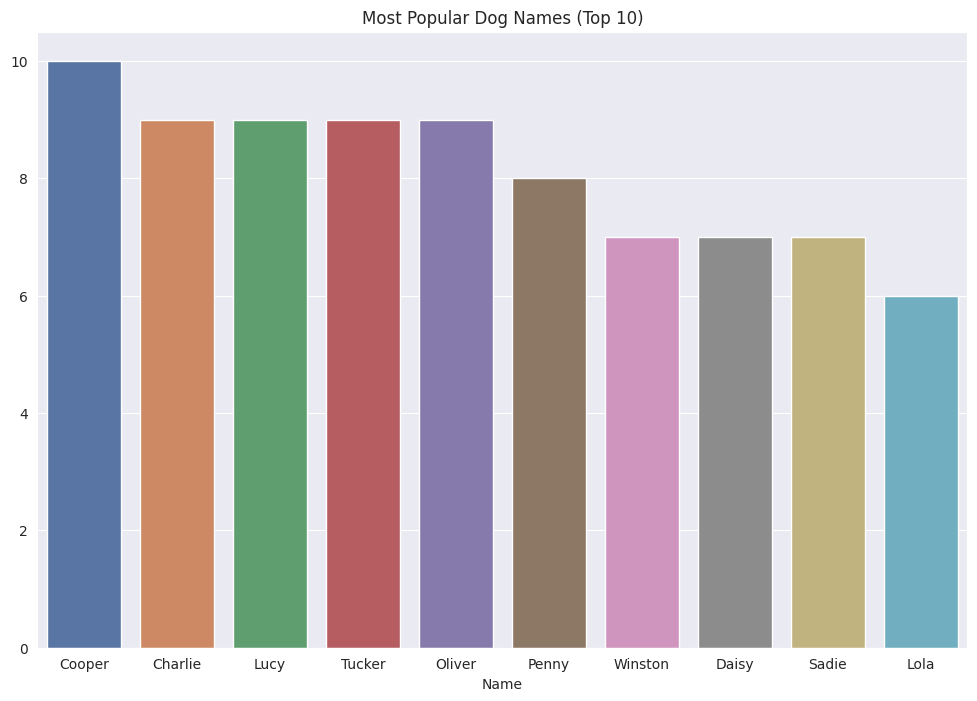

In [38]:
top10DogNames = twitter_archive_clean.name.value_counts().sort_values(ascending=False).nlargest(10)

plt.figure(figsize=(12,8))
plt.title('Most Popular Dog Names (Top 10)')
plt.xlabel('Name')
sns.set(font_scale=1.5)
sns.barplot(x=top10DogNames.index, y=top10DogNames.values)

#### Highest Rated Dog Breeds

<AxesSubplot: title={'center': 'Highest Rated Dog Breeds (Top 10)'}, xlabel='breed', ylabel='Rating'>

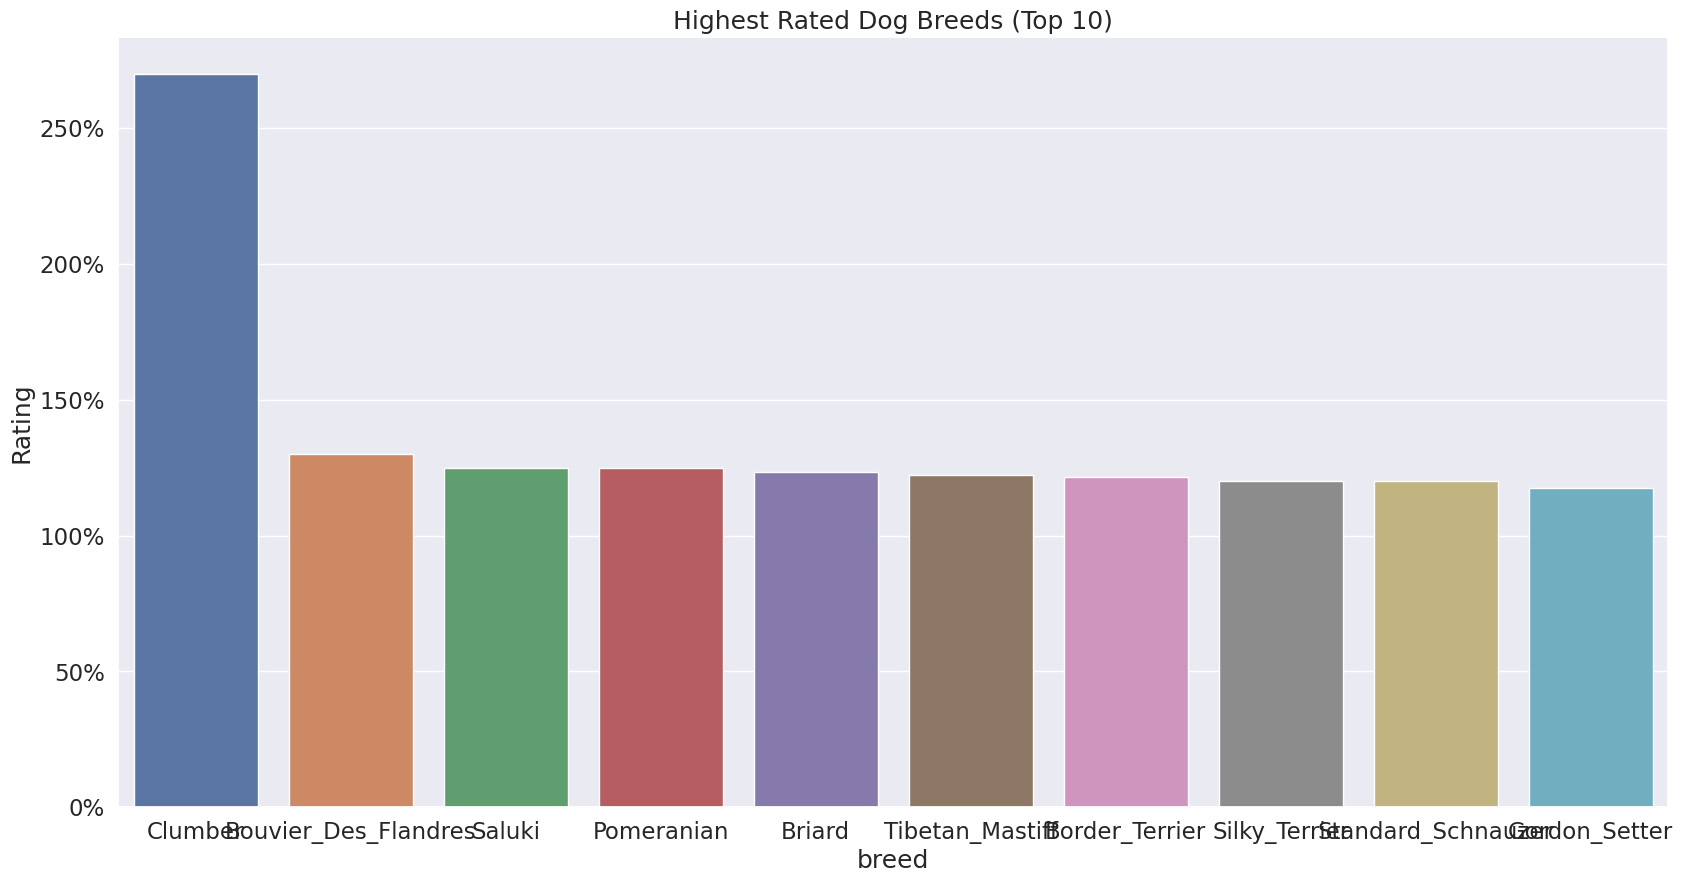

In [39]:
top10RatingByBreed = (twitter_archive_clean.groupby('breed').rating.mean()
                     .nlargest(10))

plt.figure(figsize=(20,10))
plt.title('Highest Rated Dog Breeds (Top 10)')
plt.xlabel('Dog Breed')
plt.ylabel('Rating')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.set(font_scale=0.8)
sns.barplot(x=top10RatingByBreed.index, y=top10RatingByBreed.values)

#### Most Retweeted Dog Breeds

<AxesSubplot: title={'center': 'Most Retweeted Dog Breeds (Top 10)'}, xlabel='breed', ylabel='Retweets'>

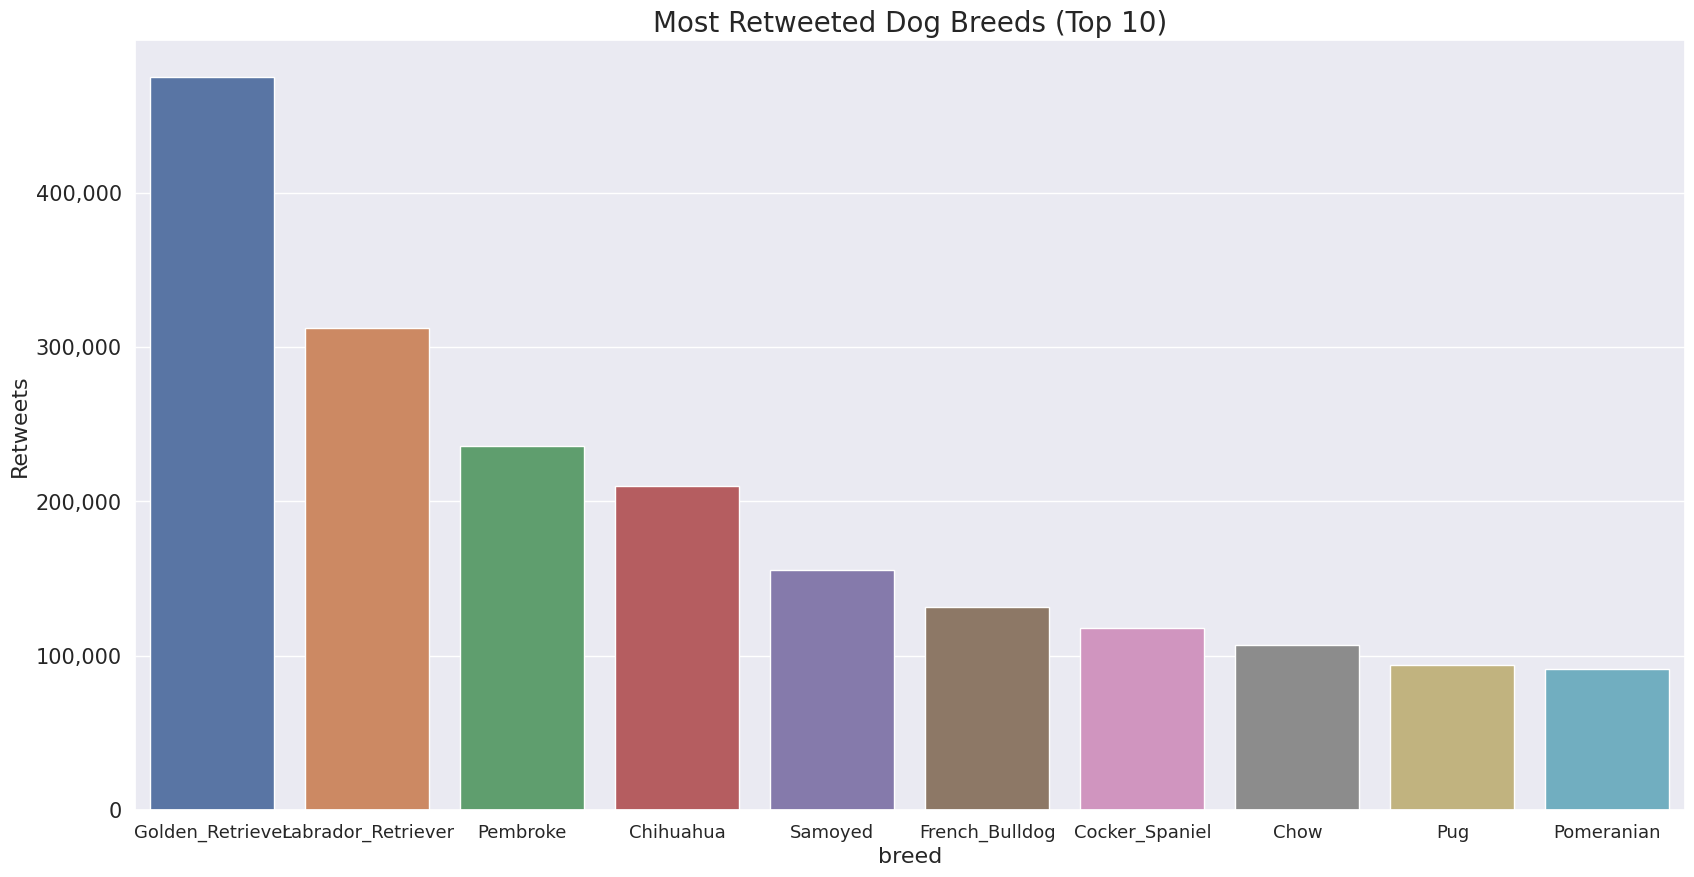

In [40]:
top10RetweetsByBreed = (twitter_archive_clean.groupby('breed').retweet_count.sum()
                     .nlargest(10))

plt.figure(figsize=(20,10))
plt.title('Most Retweeted Dog Breeds (Top 10)', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel('Dog Breed',fontsize=16)
plt.ylabel('Retweets', fontsize=16)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
sns.barplot(x=top10RetweetsByBreed.index, y=top10RetweetsByBreed.values)

#### Most Favourited Dogs Breeds

<AxesSubplot: title={'center': 'Most Favourited Dog Breeds (Top 10)'}, xlabel='breed', ylabel='Favourite Count'>

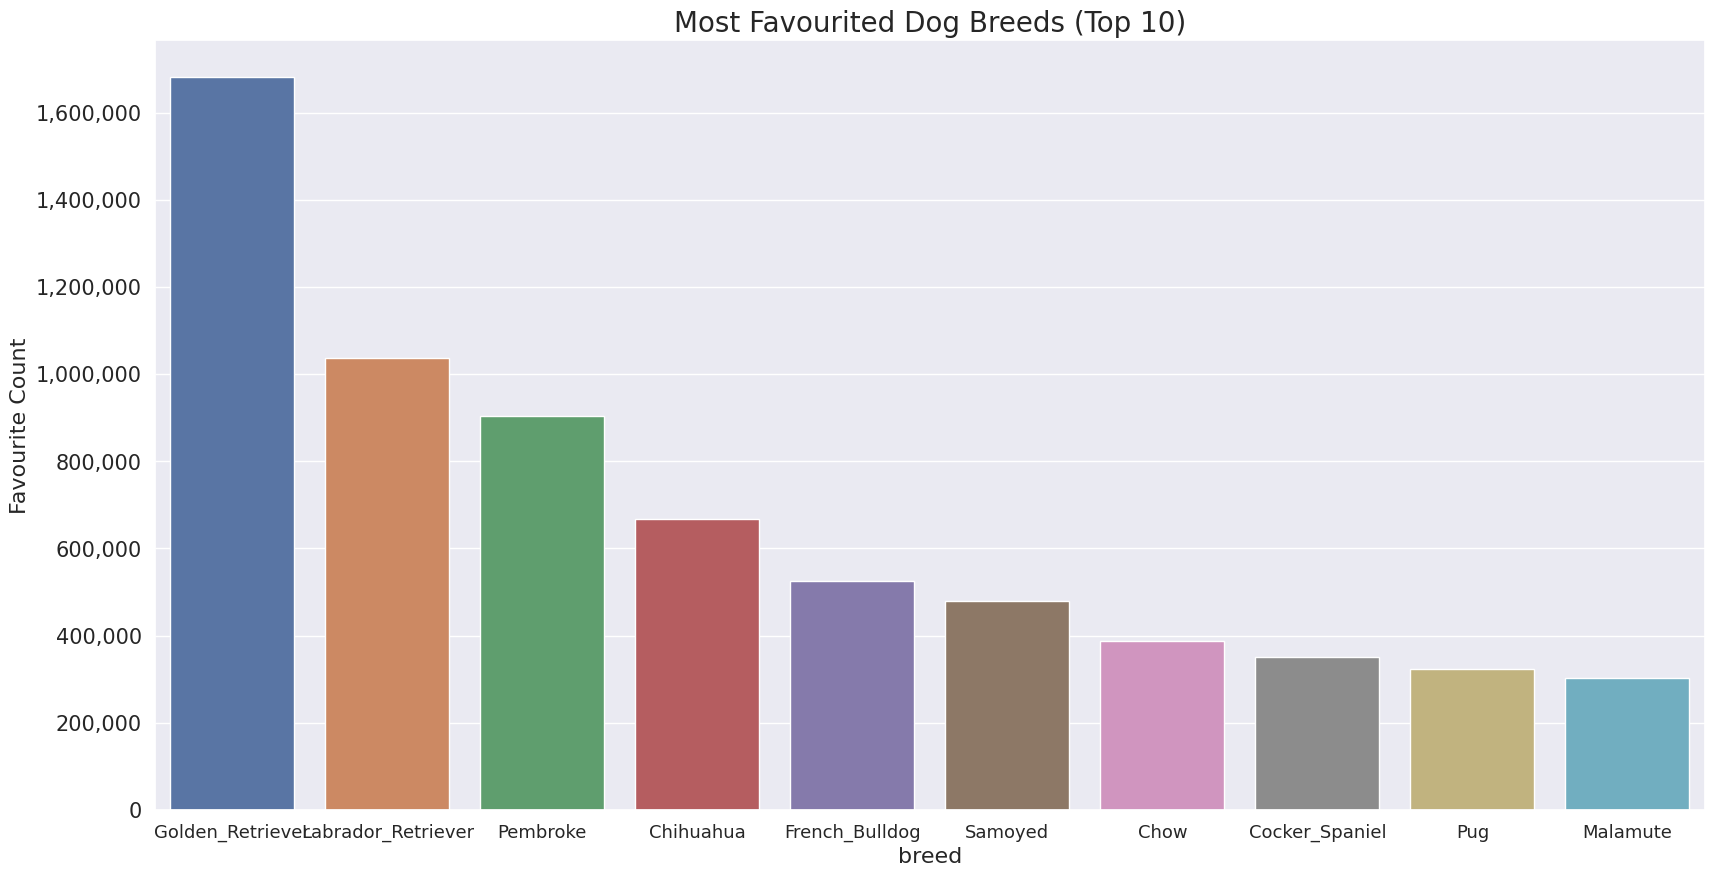

In [41]:
top10FavouritedDogs = (twitter_archive_clean.groupby('breed').favourite_count.sum()
                     .nlargest(10))

plt.figure(figsize=(20,10))
plt.title('Most Favourited Dog Breeds (Top 10)', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel('Dog Breed',fontsize=16)
plt.ylabel('Favourite Count', fontsize=16)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
sns.barplot(x=top10FavouritedDogs.index, y=top10FavouritedDogs.values)

#### Retweet count distribution

<AxesSubplot: title={'center': 'Distribution of Retweet Count'}, ylabel='Retweets'>

/home/mochen/.local/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


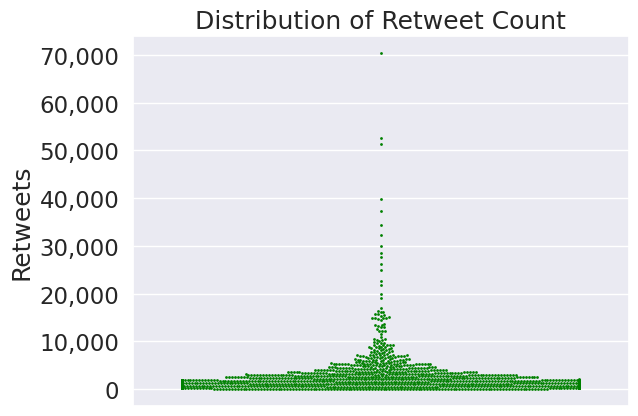

In [43]:
plt.title("Distribution of Retweet Count")
plt.ylabel('Retweets')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
sns.set(font_scale=1.5)
sns.swarmplot(data=twitter_archive_clean, y='retweet_count',
             dodge=True, color='green', size=2)

#### Favourite count distribution

<AxesSubplot: title={'center': 'Distribution of Favourite Count'}, ylabel='Favourite Count'>

/home/mochen/.local/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


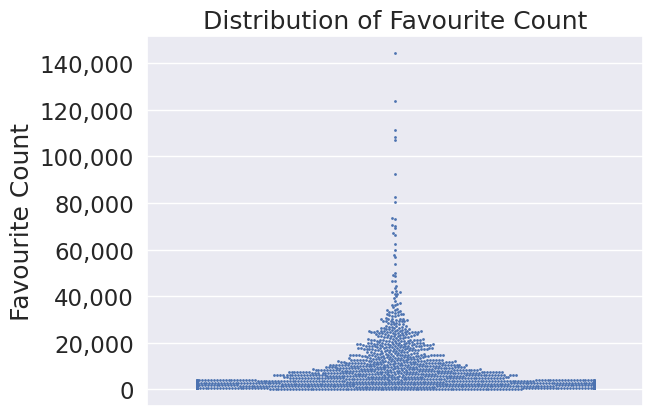

In [44]:
plt.title('Distribution of Favourite Count')
plt.ylabel('Favourite Count')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
sns.set(font_scale=1.5)
sns.swarmplot(data=twitter_archive_clean, y='favourite_count',
             dodge=True, size=2)

#### Relationship between favourite count and retweet count

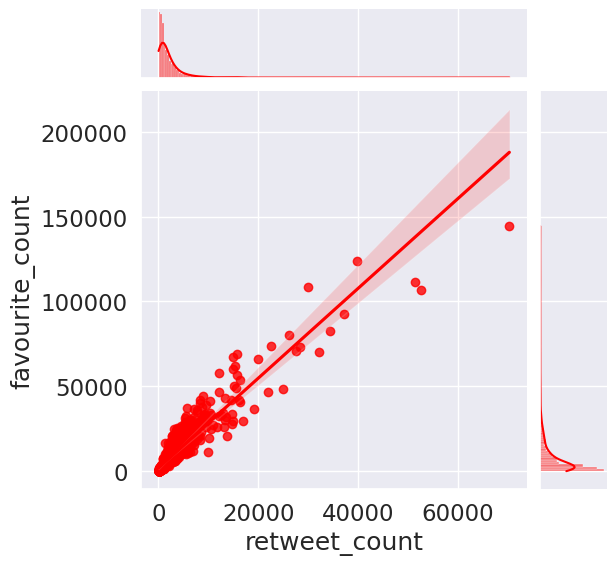

In [45]:
sns.jointplot(x='retweet_count', y='favourite_count', data=twitter_archive_clean,
             kind="reg", color = 'red')

#### Rating, retweet count and favourite count heatmap

<AxesSubplot: >

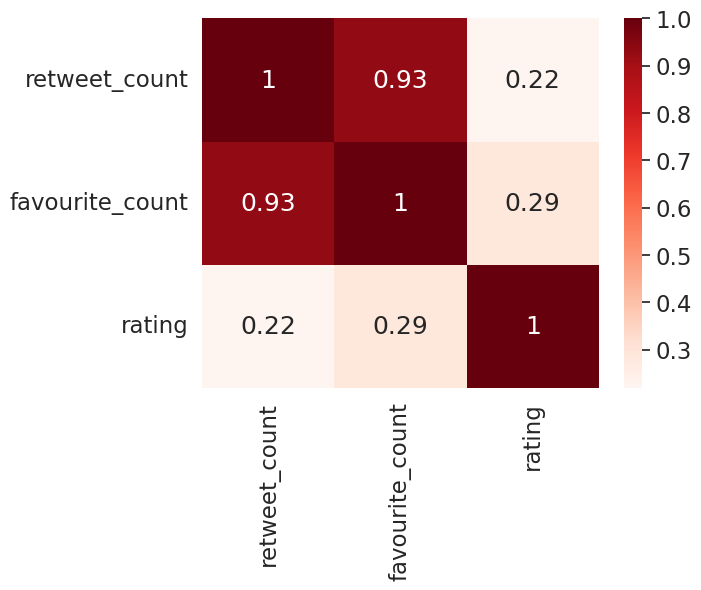

In [46]:
sns.heatmap(twitter_archive_clean[['retweet_count', 'favourite_count', 'rating']].corr(), annot=True,
           cmap="Reds")